# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


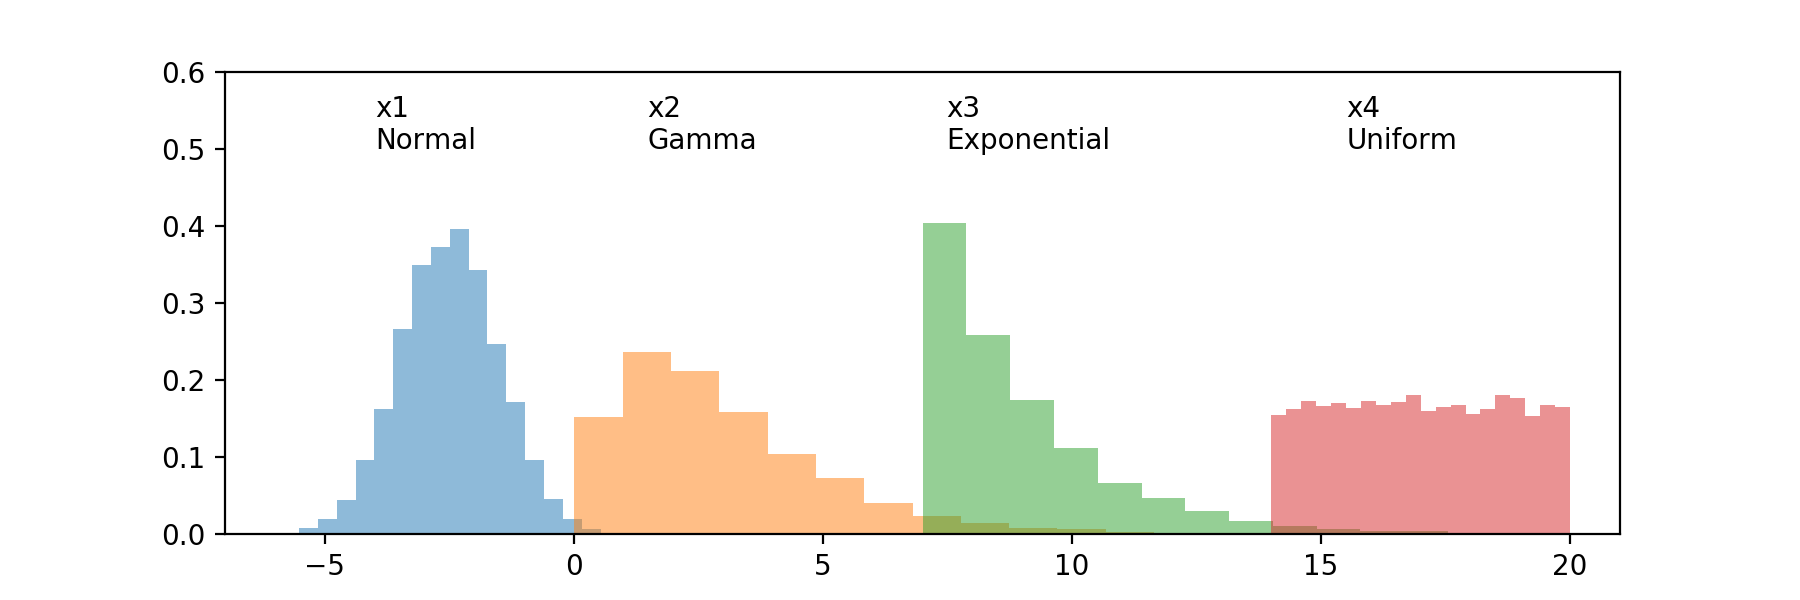

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


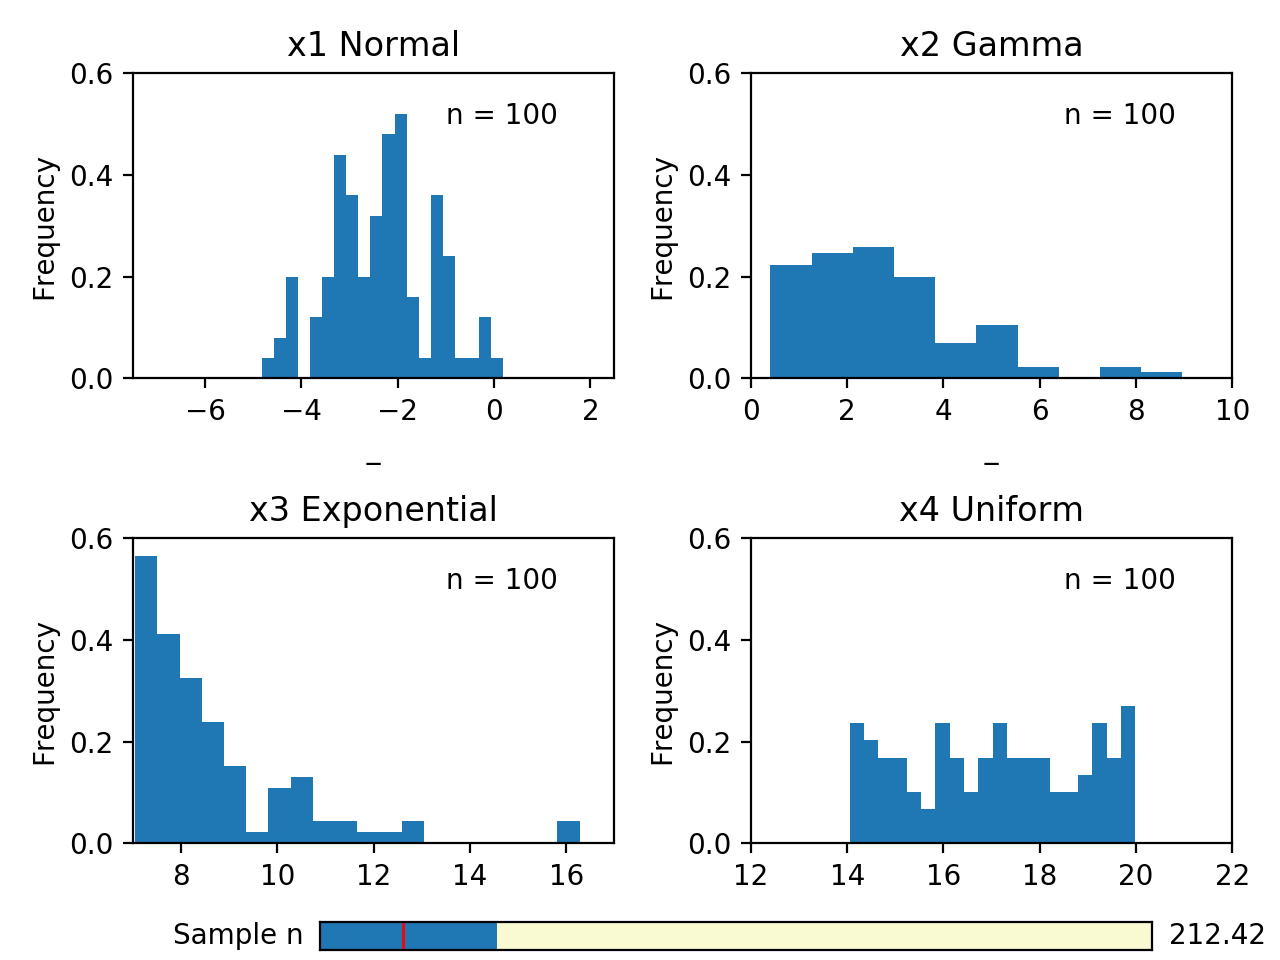

n100.0
n=100


/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6198: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
/opt/conda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


0

n=100


In [2]:
#create 2x2 grid of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# plt.subplots_adjust(bottom=0.5) # subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

axs = [ax1, ax2, ax3, ax4]
x = [x1, x2, x3, x4]

#set axes limit: xmin, xmax, ymin, ymax
axis1 = [-7.5, 2.5, 0, 0.6]
axis2 = [0, 10, 0, 0.6]
axis3 = [7, 17, 0, 0.6]
axis4 = [12, 22, 0, 0.6]
axis = [axis1, axis2, axis3, axis4]

titles = ['x1 Normal', 'x2 Gamma', 'x3 Exponential', 'x4 Uniform']
bins = [20, 20, 20, 20]
anno_x = [-1, 6.5, 13.5, 18.5]

n = 100  #initial n



import matplotlib.animation as animation

#plotting function, curr is teh current frame
def update(curr):
    print('n='+str(n))
    if curr == n:
        a.event_source.stop()
    for i in range(0, len(axs)):
        axs[i].cla()    #clear current axes
        axs[i].hist(x[i][:curr], normed = True, bins =  bins[i])
        axs[i].axis(axis[i])  
        axs[i].set_title(titles[i])
        axs[i].set_ylabel('Frequency')
        axs[i].set_xlabel('   _   ')
        axs[i].annotate('n = {}'.format(curr), [anno_x[i], 0.5])
    plt.tight_layout()

a = animation.FuncAnimation(fig, update, interval = 10) #interval: Delay between frames in milliseconds. Defaults to 200.

#set n as the variable a widget.slidebar can control
from matplotlib.widgets import Slider
def slider_update():
    n = np.floor(sample_s.val/100)*100
    print('n'+str(n)) 
    fig.canvas.draw()  
#     a = animation.FuncAnimation(fig, update(n), interval = 150)
    plt.show()

axcolor = 'lightgoldenrodyellow'
ax5= plt.axes([0.25, 0.01, 0.65, 0.03], facecolor=axcolor)


sample_s = Slider(ax5, 'Sample n', 0, 1000, valinit=100)
sample_s.on_changed(slider_update())



In [3]:
from matplotlib.widgets import Slider, Button, RadioButtons

<IPython.core.display.Javascript object>


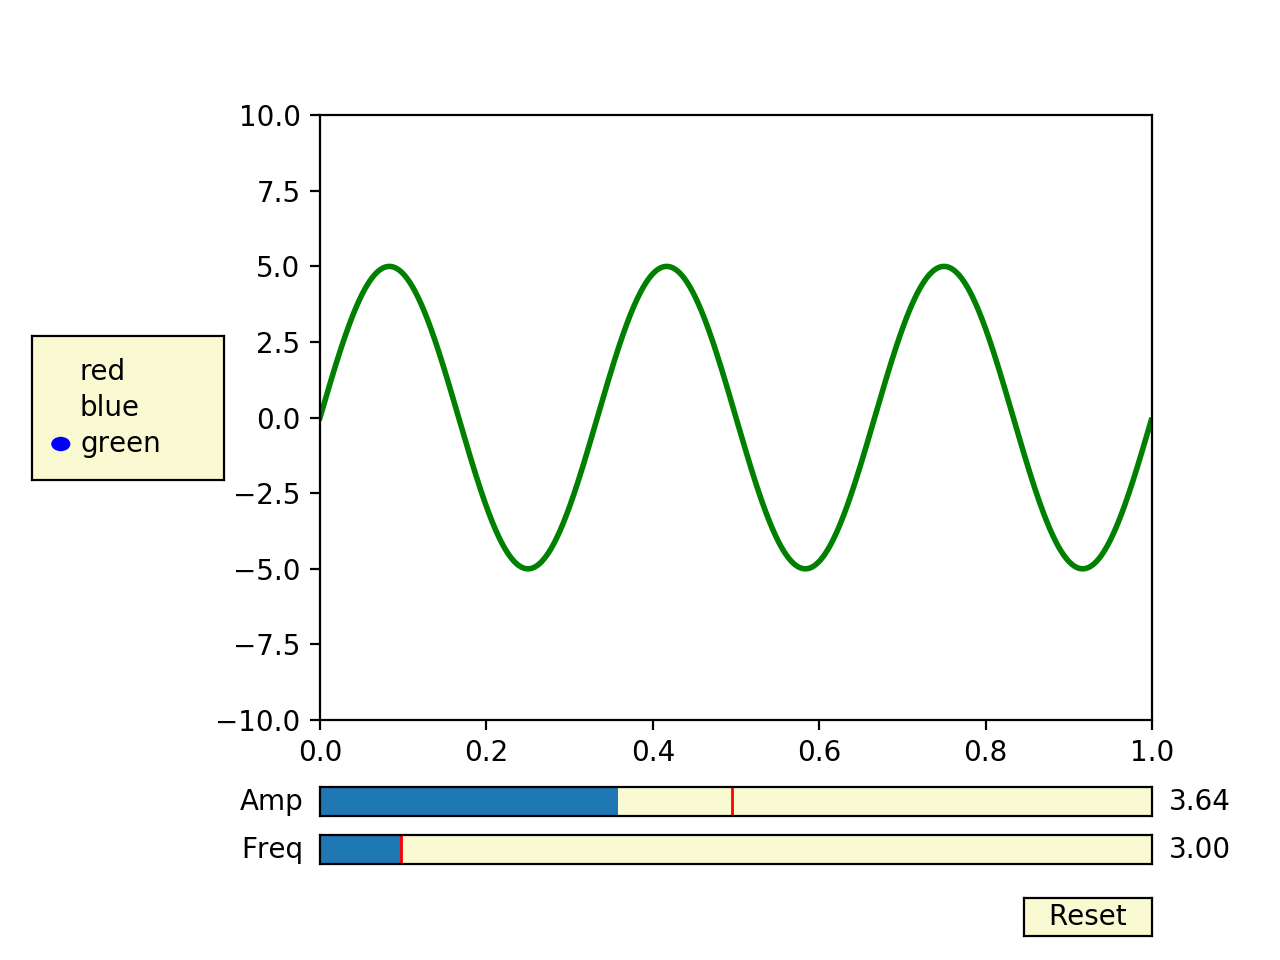

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.widgets import Slider, Button, RadioButtons

# fig, ax = plt.subplots()
# plt.subplots_adjust(left=0.25, bottom=0.25)
# t = np.arange(0.0, 1.0, 0.001)
# a0 = 5
# f0 = 3
# s = a0*np.sin(2*np.pi*f0*t)
# l, = plt.plot(t, s, lw=2, color='red')
# plt.axis([0, 1, -10, 10])

# axcolor = 'lightgoldenrodyellow'
# axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
# axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

# sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
# samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


# def update(val):
#     amp = samp.val
#     freq = sfreq.val
#     print('amp'+amp)
#     l.set_ydata(amp*np.sin(2*np.pi*freq*t))
#     fig.canvas.draw_idle()
# sfreq.on_changed(update)
# samp.on_changed(update)

# resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


# def reset(event):
#     sfreq.reset()
#     samp.reset()
# button.on_clicked(reset)

# rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
# radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


# def colorfunc(label):
#     l.set_color(label)
#     fig.canvas.draw_idle()
# radio.on_clicked(colorfunc)

# plt.show()